In [1]:
import pandas as pd
import numpy as np
from recordlinkage.preprocessing import clean
from recordlinkage.preprocessing import phonetic
from recordlinkage.index import Full
from recordlinkage.index import Block
import recordlinkage as rl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#Opening the records
main_org = pd.read_excel('Main Records.xlsx')
main = main_org.copy()
dup_org = pd.read_excel('sample.xlsx') #1300 Best Possible matches found using record linkage
dup=dup_org.copy()

In [3]:
main.head()

,ID,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue)
0,1f27cdd1,Schwartz,Daniel,12/09/2013,NaN,NaN,Pentecostalism and other Charismatic,NaN,White,NaN,NaN,English
1,3bb0e015,Wishart,Ray,07/24/2007,NaN,NaN,Sikhism,NaN,Southeast Asian,NaN,NaN,NaN
2,4b532e78,Woods,Shirley,07/10/2020,NaN,NaN,United Church,NaN,East Asian,NaN,NaN,Korean
3,612a0deb,Germon,Tom,09/06/2014,NaN,Indian,NaN,Indian,Indian,Canada,Canada,NaN
4,5c1ac840,Williams,Betty,04/28/2020,NaN,NaN,NaN,NaN,Black,Canada,Canada,English


In [4]:
dup.head()

,ID,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue),Main ID
0,e786f89d,Rowland,John,11/22/2017,Roeland,NaN,NaN,NaN,NaN,NaN,NaN,Urdu,55363184
1,4a5d3861,Vance,Robert,04/14/2013,Vance,NaN,United Church,NaN,NaN,NaN,NaN,NaN,6dc6b4fc
2,a53f9954,Carvalho,Robert,10/29/2010,Carvalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,040a9711
3,58c8cc15,Shipe,Catharine,06/12/2011,Shipe,NaN,NaN,NaN,NaN,NaN,Canada,Arabic,3bf66073
4,486aab5e,Murphey,Marie,01/23/2019,Murphey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1808f71c


In [5]:
#Creating the match index
main_index = []
dup_index = []
for i in range(len(dup)):
    dup_index.append(i)
    main_id = main[main['ID']==dup['Main ID'].loc[i]].index[0]
    main_index.append(main_id)
        

In [6]:
match_df = pd.DataFrame()
match_df['Main Index'] = main_index
match_df['Dup Index'] = dup_index

In [7]:
dup = dup.drop(['Main ID'], axis = 1)

In [8]:
#Adding the following columns to the main and sample data
cols = main.columns.values
cols=np.insert(cols, 0,'Phon Mother Name')
cols=np.insert(cols, 0,'Phon First Name')
cols=np.insert(cols, 0,'Phon Last Name')

In [9]:
method = 'metaphone'
clean_main_last = clean (main["Last Name"])
clean_main_first = clean(main['First Name'])
clean_main_mother = clean(main["Mother's Birth Last Name"] )
clean_main_last = phonetic(clean_main_last, method = method, concat=True, encoding='utf-8', decode_error='strict')
clean_main_first = phonetic(clean_main_first, method = method, concat=True, encoding='utf-8', decode_error='strict')
clean_main_mother = phonetic(clean_main_mother, method = method, concat=True, encoding='utf-8', decode_error='strict')
clean_main = pd.concat([clean_main_last, clean_main_first, clean_main_mother, main], axis = 1)
clean_main.columns = cols

In [10]:
method = 'metaphone'
clean_dup_last = clean (dup["Last Name"])
clean_dup_first = clean (dup["First Name"])
clean_dup_mother = clean (dup["Mother's Birth Last Name"])
clean_dup_last = phonetic(clean_dup_last, method = method, concat=True, encoding='utf-8', decode_error='strict')
clean_dup_first = phonetic(clean_dup_first, method = method, concat=True, encoding='utf-8', decode_error='strict')
clean_dup_mother = phonetic(clean_dup_mother, method = method, concat=True, encoding='utf-8', decode_error='strict')
clean_dup = pd.concat([clean_dup_last, clean_dup_first, clean_dup_mother, dup], axis = 1)
clean_dup.columns = cols

In [11]:
clean_dup

,Phon Last Name,Phon First Name,Phon Mother Name,ID,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue)
0,RLNT,JN,RLNT,e786f89d,Rowland,John,11/22/2017,Roeland,NaN,NaN,NaN,NaN,NaN,NaN,Urdu
1,FNS,RBRT,FNS,4a5d3861,Vance,Robert,04/14/2013,Vance,NaN,United Church,NaN,NaN,NaN,NaN,NaN
2,KRFLH,RBRT,KRFLH,a53f9954,Carvalho,Robert,10/29/2010,Carvalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XP,K0RN,XP,58c8cc15,Shipe,Catharine,06/12/2011,Shipe,NaN,NaN,NaN,NaN,NaN,Canada,Arabic
4,MRF,MR,MRF,486aab5e,Murphey,Marie,01/23/2019,Murphey,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,WTN,LSL,NaN,9640f4f6,Whiton,Leslie,08/24/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1296,MKWLMS,XN,NaN,457c8d06,Macwilliams,Shawn,06/03/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,KRLSN,HP,NaN,d706c8ad,Carlsen,Hope,12/21/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,XS,XRLT,NaN,68492908,Chace,Charlotte,02/28/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Block Index
indexer = rl.Index()
indexer.add(Block('First Name', 'First Name'))
indexer.add(Block('Last Name', 'Last Name'))
indexer.add(Block("Mother's Birth Last Name", "Mother's Birth Last Name"))
indexer.add(Block('Last Name', "Mother's Birth Last Name"))
indexer.add(Block( "Mother's Birth Last Name", 'Last Name'))
indexer.add(Block('Phon First Name', 'Phon First Name'))
indexer.add(Block('Phon Last Name', 'Phon Last Name'))
indexer.add(Block("Phon Mother Name", "Phon Mother Name"))
indexer.add(Block('Phon Last Name', "Phon Mother Name"))
indexer.add(Block( "Phon Mother Name", 'Phon Last Name'))
candidate_links = indexer.index(clean_main, clean_dup)

In [13]:
#Comparing features between the main and sample data set
name_th = 0.85
method = "levenshtein"
missing = 0
disagree = -1
compare_cl = rl.Compare()
compare_cl.exact('Last Name', 'Last Name',label="Last Name", disagree_value = disagree)
compare_cl.exact('First Name', 'First Name', label="First Name", disagree_value = disagree)
compare_cl.exact("Mother's Birth Last Name", "Mother's Birth Last Name", label="Mother's Birth Last Name", disagree_value = disagree)
compare_cl.exact("Mother's Birth Last Name", 'Last Name', label="Main-Mother->Last", disagree_value = disagree)
compare_cl.exact('Last Name', "Mother's Birth Last Name",  label="Main-Last->Mother", disagree_value = disagree)
compare_cl.exact('Phon Last Name', 'Phon Last Name',label="Phon Last Name", disagree_value = disagree)
compare_cl.exact('Phon First Name', 'Phon First Name', label="Phon First Name", disagree_value = disagree)
compare_cl.exact("Phon Mother Name", "Phon Mother Name", label="Phon Mother's Birth Last Name", disagree_value = disagree)
compare_cl.exact("Phon Mother Name", 'Phon Last Name', label="Phon Main-Mother->Last", disagree_value = disagree)
compare_cl.exact('Phon Last Name', "Phon Mother Name",  label="Phon Main-Last->Mother", disagree_value = disagree)
compare_cl.exact("Date of Birth", "Date of Birth", label="DOB", disagree_value = disagree)
compare_cl.string("Date of Birth", "Date of Birth",method=method, threshold=name_th, label="fuzzy DOB")
compare_cl.exact('Indigenous Identity', "Indigenous Identity",  label="Indigenous Identity", disagree_value = disagree)
compare_cl.exact("Religion", "Religion", label="Religion", disagree_value = disagree)
compare_cl.exact("Ethnicity", "Ethnicity", label="Ethnicity", disagree_value = disagree)
compare_cl.exact("Race", "Race", label="Race", disagree_value = disagree)
compare_cl.exact("Place of Birth", "Place of Birth", label="POB", disagree_value = disagree)
compare_cl.exact("Citizenship", "Citizenship", label="Citizenship", disagree_value = disagree)
compare_cl.exact("Language (Mother Tongue)", "Language (Mother Tongue)", label="Language", disagree_value = disagree)
features = compare_cl.compute(candidate_links, clean_main,clean_dup)

In [14]:
#Creating new feature to account for last names not matching but mother's last name matching
pln = features['Phon Last Name'].values
pmn = features["Phon Mother's Birth Last Name"].values
pmnl = features["Phon Main-Mother->Last"].values
pmnr = features["Phon Main-Last->Mother"].values

for i in range(len(pln)):
    if pln[i]<0:
        if ((pmn[i]>0) or  (pmnl[i]>0) or (pmnr[i] >  0)):
            pln[i] = 2
    if pmn[i]<0:
        if ((pln[i]>0) or  (pmnl[i]>0) or (pmnr[i] >  0)):
            pmn[i] = 2
    if pmnl[i]<0:
        if ((pln[i]>0) or  (pmn[i]>0) or (pmnr[i] >  0)):
            pmnl[i] = 2
    if pmnr[i]<0:
        if ((pln[i]>0) or  (pmnl[i]>0) or (pmn[i] >  0)):
            pmnr[i] = 2
            

features['Phon Last Name'] = pln
features["Phon Mother's Birth Last Name"] = pmn
features["Phon Main-Mother->Last"] = pmnl
features["Phon Main-Last->Mother"] = pmnr

In [15]:
col_n = features.columns.values
col_n=np.insert(col_n, 0,'Dup Index')
col_n=np.insert(col_n, 0,'Main Index')

In [16]:
sample = features.reset_index()
sample.columns = col_n

In [17]:
sample_org = sample.copy()

In [18]:
#Creating features to account for DOB being a close match
dob = sample['DOB'].values
f_dob = sample['fuzzy DOB'].values
m_dec = main['Date of Birth'].isna()
d_dec = dup['Date of Birth'].isna()

for i in range(len(dob)):
    if f_dob[i]==0:
        m_ind = sample['Main Index'].loc[i]
        d_ind = sample['Dup Index'].loc[i]
        if (m_dec[m_ind] == False) and (d_dec[d_ind] == False):
            f_dob[i] = -1
    
    if dob[i]==1:
        f_dob[i] = 2    
    
    
    if dob[i]<0:
        if f_dob[i]>0:
            dob[i] = 2

In [19]:
ind = sample[['Main Index', 'Dup Index']]

In [20]:
#Processed Training Data Frame
sam = sample.drop(['Main Index', 'Dup Index'], axis = 1)
sam = sam.astype(str)
sam = pd.get_dummies(sam)
df = pd.concat([ind, sam], axis = 1)
df

,Main Index,Dup Index,Last Name_-1,Last Name_1,First Name_-1,First Name_0,First Name_1,Mother's Birth Last Name_-1,Mother's Birth Last Name_0,Mother's Birth Last Name_1,...,Race_0,POB_-1,POB_0,POB_1,Citizenship_-1,Citizenship_0,Citizenship_1,Language_-1,Language_0,Language_1
0,0,73,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1,0,332,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
2,0,556,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
3,0,582,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,0,740,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123201,20000,353,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
123202,20000,416,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
123203,20000,701,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
123204,20000,714,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0


In [21]:
all_cols = ['Main Index', 'Dup Index','Last Name_-1', 'Last Name_0', 'Last Name_1', 'First Name_-1',
       'First Name_0', 'First Name_1', "Mother's Birth Last Name_-1",
       "Mother's Birth Last Name_0", "Mother's Birth Last Name_1",
       'Main-Mother->Last_-1', 'Main-Mother->Last_0',
       'Main-Mother->Last_1', 'Main-Last->Mother_-1',
       'Main-Last->Mother_0', 'Main-Last->Mother_1', 'Phon Last Name_-1',
       'Phon Last Name_0', 'Phon Last Name_1', 'Phon Last Name_2',
       'Phon First Name_-1', 'Phon First Name_0', 'Phon First Name_1',
       "Phon Mother's Birth Last Name_-1",
       "Phon Mother's Birth Last Name_0",
       "Phon Mother's Birth Last Name_1",
       "Phon Mother's Birth Last Name_2", 'Phon Main-Mother->Last_-1',
       'Phon Main-Mother->Last_0', 'Phon Main-Mother->Last_1',
       'Phon Main-Mother->Last_2', 'Phon Main-Last->Mother_-1',
       'Phon Main-Last->Mother_0', 'Phon Main-Last->Mother_1',
       'Phon Main-Last->Mother_2', 'DOB_-1', 'DOB_1', 'DOB_2',
       'fuzzy DOB_-1.0', 'fuzzy DOB_1.0', 'Indigenous Identity_-1',
       'Indigenous Identity_0', 'Indigenous Identity_1', 'Religion_-1',
       'Religion_0', 'Religion_1', 'Ethnicity_-1', 'Ethnicity_0',
       'Ethnicity_1', 'Race_0', 'POB_-1', 'POB_0', 'POB_1',
       'Citizenship_-1', 'Citizenship_0', 'Citizenship_1', 'Language_-1',
       'Language_0', 'Language_1']

In [23]:
#Ensuring all columns are available in the training data
col = df.columns.values
for colum in all_cols:
    if colum not in col:
        df[colum] = [0]*len(df)

In [24]:
df = df[all_cols]

In [25]:
#Creating the matching index for the training data sample
m_i =[]
for i in range(len(match_df)):
    m_match = match_df['Main Index'].loc[i]
    d_match = match_df['Dup Index'].loc[i]
    a = sample[sample['Main Index'] == m_match]
    b = a[a['Dup Index'] == d_match]
    m_i.append(b.index[0])

In [26]:
m = [0] * len(sample)
for i in range(len(m_i)):
    j = m_i[i]
    m[j] = 1

In [27]:
df['Match'] = m

In [28]:
pd.set_option('display.max_columns', 15)

In [29]:
df

,Main Index,Dup Index,Last Name_-1,Last Name_0,Last Name_1,First Name_-1,First Name_0,...,Citizenship_-1,Citizenship_0,Citizenship_1,Language_-1,Language_0,Language_1,Match
0,0,73,1,0,0,0,0,...,0,1,0,0,1,0,0
1,0,332,1,0,0,0,0,...,0,1,0,0,1,0,0
2,0,556,1,0,0,0,0,...,0,1,0,0,1,0,0
3,0,582,1,0,0,0,0,...,0,1,0,0,1,0,0
4,0,740,1,0,0,0,0,...,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123201,20000,353,1,0,0,0,0,...,0,1,0,0,1,0,0
123202,20000,416,1,0,0,0,0,...,0,1,0,0,1,0,0
123203,20000,701,1,0,0,0,0,...,0,1,0,0,1,0,0
123204,20000,714,1,0,0,0,0,...,0,1,0,0,1,0,0


In [30]:
#Splitting the data set
X = df.drop(['Match'], axis = 1)
y = df[['Main Index', 'Dup Index', 'Match']]

In [31]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

In [32]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [33]:
train = X_train.drop(['Main Index', 'Dup Index'], axis = 1)
train_y = y_train['Match'].values

In [34]:
val = X_val.drop(['Main Index', 'Dup Index'], axis = 1)
val_y = y_val['Match'].values

In [35]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as  RFC
model = RFC(random_state=0)
model.fit(train, train_y)

Y_pred = model.predict(val)
p,r,f,s = precision_recall_fscore_support(val_y, Y_pred)
print("Decision Tree Classifier")
print("Accuracy: " ,accuracy_score(val_y, Y_pred))
print("F1 Score: " ,f1_score(val_y,Y_pred))
print("Precision: " ,precision_score(val_y, Y_pred))
print("Recall: " ,recall_score(val_y, Y_pred))
#Confusion Matrix
df_confusion = pd.crosstab(list(map(bool,list(val_y))), list(map(bool,list(Y_pred))),rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Decision Tree Classifier
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0


Predicted,False,True,All
Actual,,,
False,24392,0,24392
True,0,249,249
All,24392,249,24641


<BarContainer object of 10 artists>

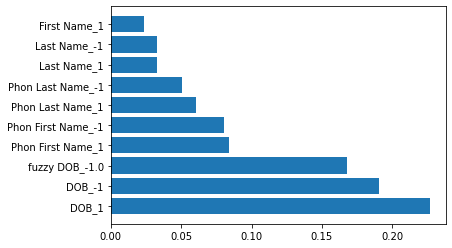

In [36]:
#Feature Importance
coef = pd.DataFrame(zip(train.columns, model.feature_importances_))
coef = coef.sort_values(coef.columns[1],ascending = False)
coef_done = coef.head(10)

plt.barh(coef_done[0], coef_done[1])

In [101]:
#Overall Feature Importance
new_coef = coef.copy()
new_coef = new_coef.reset_index(drop = True)
coef_col = ['Other']*len(new_coef)


In [102]:
for i in range(len(new_coef)):
    if "DOB" in new_coef[0].loc[i]:
        coef_col[i] = "Date of Birth"
    if "Last Name" in new_coef[0].loc[i]:
        coef_col[i] = "Last Name"
    if "First Name" in new_coef[0].loc[i]:
         coef_col[i] = "First Name"
    if "Mother" in new_coef[0].loc[i]:
        coef_col[i] = "Mother's Last Name"
        


In [103]:
new_coef['Features'] = coef_col

In [100]:
new_coef.to_excel('5040coef.xlsx')

<BarContainer object of 5 artists>

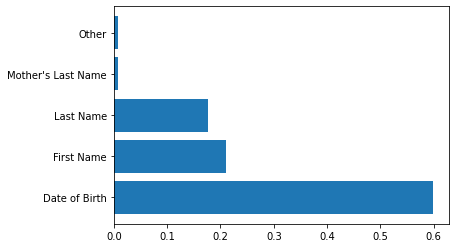

In [104]:
bar = new_coef.drop([0], axis = 1)
bar = bar.groupby('Features').sum().reset_index()
plt.barh(bar['Features'], bar[1])

In [38]:
#Lazy predictor
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(train, val, train_y, val_y)
models

100%|██████████| 29/29 [00:42<00:00,  1.47s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,2.72
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.21
XGBClassifier,1.00,1.00,1.00,1.00,1.49
SGDClassifier,1.00,1.00,1.00,1.00,0.34
RandomForestClassifier,1.00,1.00,1.00,1.00,1.19
BaggingClassifier,1.00,1.00,1.00,1.00,0.59
LinearSVC,1.00,1.00,1.00,1.00,0.54
LogisticRegression,1.00,1.00,1.00,1.00,0.67
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.23


In [40]:
#Decision Tree Classifer
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, train_y)

In [41]:
Y_pred = clf.predict(val)
p,r,f,s = precision_recall_fscore_support(val_y, Y_pred)
print("Decision Tree Classifier")
print("Accuracy: " ,accuracy_score(val_y, Y_pred))
print("F1 Score: " ,f1_score(val_y,Y_pred))
print("Precision: " ,precision_score(val_y, Y_pred))
print("Recall: " ,recall_score(val_y, Y_pred))
#Confusion Matrix
df_confusion = pd.crosstab(list(map(bool,list(val_y))), list(map(bool,list(Y_pred))),rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Decision Tree Classifier
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0


Predicted,False,True,All
Actual,,,
False,24392,0,24392
True,0,249,249
All,24392,249,24641


[Text(0.4, 0.9, 'DOB_1 <= 0.5\n0.021\n73923\n[73127, 796]\nNo Match'),
 Text(0.2, 0.7, '0.0\n73033\n[73033, 0]\nNo Match'),
 Text(0.6, 0.7, 'Phon Last Name_-1 <= 0.5\n0.189\n890\n[94, 796]\nMatch'),
 Text(0.4, 0.5, 'Phon First Name_-1 <= 0.5\n0.05\n817\n[21, 796]\nMatch'),
 Text(0.2, 0.3, '0.0\n794\n[0, 794]\nMatch'),
 Text(0.6, 0.3, 'Phon Main-Mother->Last_0 <= 0.5\n0.159\n23\n[21, 2]\nNo Match'),
 Text(0.4, 0.1, '0.0\n2\n[0, 2]\nMatch'),
 Text(0.8, 0.1, '0.0\n21\n[21, 0]\nNo Match'),
 Text(0.8, 0.5, '0.0\n73\n[73, 0]\nNo Match')]

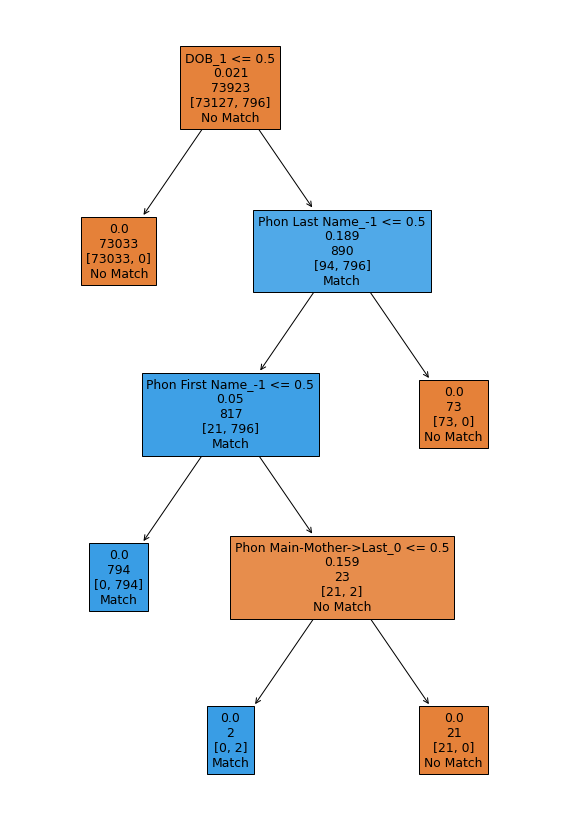

In [42]:
plt.figure(figsize=(10,15))
tree.plot_tree(clf, feature_names=train.columns.values, label = 'none', filled = True, class_names = ['No Match','Match'])

In [43]:
#Logistic Regression Classifier
'''
from sklearn.linear_model import LogisticRegression as LR
model = LR(random_state=0)
model.fit(train, train_y)

Y_pred = model.predict(val)
p,r,f,s = precision_recall_fscore_support(val_y, Y_pred)
print("Decision Tree Classifier")
print("Accuracy: " ,accuracy_score(val_y, Y_pred))
print("F1 Score: " ,f1_score(val_y,Y_pred))
print("Precision: " ,precision_score(val_y, Y_pred))
print("Recall: " ,recall_score(val_y, Y_pred))
#Confusion Matrix
df_confusion = pd.crosstab(list(map(bool,list(val_y))), list(map(bool,list(Y_pred))),rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion
'''

'\nfrom sklearn.linear_model import LogisticRegression as LR\nmodel = LR(random_state=0)\nmodel.fit(train, train_y)\n\nY_pred = model.predict(val)\np,r,f,s = precision_recall_fscore_support(val_y, Y_pred)\nprint("Decision Tree Classifier")\nprint("Accuracy: " ,accuracy_score(val_y, Y_pred))\nprint("F1 Score: " ,f1_score(val_y,Y_pred))\nprint("Precision: " ,precision_score(val_y, Y_pred))\nprint("Recall: " ,recall_score(val_y, Y_pred))\n#Confusion Matrix\ndf_confusion = pd.crosstab(list(map(bool,list(val_y))), list(map(bool,list(Y_pred))),rownames=[\'Actual\'], colnames=[\'Predicted\'], margins=True)\ndf_confusion\n'

In [44]:
#Importing the merged data set created using Random Forest Classifer
golden = pd.read_excel('Classified.xlsx')
golden = golden.drop(['Unnamed: 0','Match','Dup ID', 'Quality','Combined'], axis = 1)

In [45]:
golden

,ID,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue)
0,1f27cdd1,Schwartz,Daniel,12/09/2013,NaN,NaN,Pentecostalism and other Charismatic,NaN,White,NaN,NaN,English
1,3bb0e015,Wishart,Ray,07/24/2007,NaN,NaN,Sikhism,NaN,Southeast Asian,NaN,NaN,NaN
2,4b532e78,Woods,Shirley,07/10/2020,NaN,NaN,United Church,NaN,East Asian,NaN,NaN,Korean
3,612a0deb,Germon,Tom,09/06/2014,NaN,Indian,NaN,Indian,Indian,Canada,Canada,NaN
4,5c1ac840,Williams,Betty,04/28/2020,NaN,NaN,NaN,NaN,Black,Canada,Canada,English
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,43d9ceca,Fernandez,Matthew,08/07/2015,NaN,American Indian,NaN,American Indian,American Indian,NaN,Canada,Arabic
19997,56c09f74,Matthews,Shari,02/28/2015,NaN,NaN,Other/not recorded,White,White,NaN,Canada,NaN
19998,25e05eb1,Konty,Lisa,12/15/2022,NaN,NaN,NaN,NaN,Black,NaN,NaN,English
19999,81d18750,Knowlton,Harold,10/24/2018,NaN,Alaska Native,NaN,Alaska Native,Alaska Native,NaN,Canada,NaN


In [46]:
#Function to compare new records with the existing database
def check(df1):
    df = df1.copy()
    order = df.columns.values
    df['ID'] = 'xxxxxxxxx'
    order = np.insert(order,0, 'ID')
    df = df[order]
    cols1 = golden.columns.values
    cols1=np.insert(cols1, 0,'Phon Mother Name')
    cols1=np.insert(cols1, 0,'Phon First Name')
    cols1=np.insert(cols1, 0,'Phon Last Name')
    
    method = 'metaphone'
    clean_golden_last = clean (golden["Last Name"])
    clean_golden_first = clean(golden['First Name'])
    clean_golden_mother = clean(golden["Mother's Birth Last Name"] )
    clean_golden_last = phonetic(clean_golden_last, method = method, concat=True, encoding='utf-8', decode_error='strict')
    clean_golden_first = phonetic(clean_golden_first, method = method, concat=True, encoding='utf-8', decode_error='strict')
    clean_golden_mother = phonetic(clean_golden_mother, method = method, concat=True, encoding='utf-8', decode_error='strict')
    clean_golden = pd.concat([clean_golden_last, clean_golden_first, clean_golden_mother, golden], axis = 1)
    clean_golden.columns = cols1
    
    
    if df["Last Name"].isna().sum() != len(df):
        clean_df_last = clean (df["Last Name"])
        clean_df_last = phonetic(clean_df_last, method = method, concat=True, encoding='utf-8', decode_error='strict')
    else:
        clean_df_last = df["Last Name"]
    
    if df["First Name"].isna().sum() != len(df):
        clean_df_first = clean (df["First Name"])
        clean_df_first = phonetic(clean_df_first, method = method, concat=True, encoding='utf-8', decode_error='strict')
    else:
        clean_df_first = df["First Name"]

    if df["Mother's Birth Last Name"].isna().sum() != len(df):
        clean_df_mother = clean (df["Mother's Birth Last Name"])
        clean_df_mother = phonetic(clean_df_mother, method = method, concat=True, encoding='utf-8', decode_error='strict')
    else:
        clean_df_mother = df["Mother's Birth Last Name"]

    clean_df = pd.concat([clean_df_last, clean_df_first, clean_df_mother, df], axis = 1)
    clean_df.columns = cols1
    
    #Block Index
    indexer1 = rl.Index()
    indexer1.add(Full())
    candidate_links1 = indexer1.index(clean_golden, clean_df)
    
    name_th = 0.85
    method = "levenshtein"
    missing = 0
    disagree = -1
    compare_cl1 = rl.Compare()
    compare_cl1.exact('Last Name', 'Last Name',label="Last Name", disagree_value = disagree)
    compare_cl1.exact('First Name', 'First Name', label="First Name", disagree_value = disagree)
    compare_cl1.exact("Mother's Birth Last Name", "Mother's Birth Last Name", label="Mother's Birth Last Name", disagree_value = disagree)
    compare_cl1.exact("Mother's Birth Last Name", 'Last Name', label="Main-Mother->Last", disagree_value = disagree)
    compare_cl1.exact('Last Name', "Mother's Birth Last Name",  label="Main-Last->Mother", disagree_value = disagree)
    compare_cl1.exact('Phon Last Name', 'Phon Last Name',label="Phon Last Name", disagree_value = disagree)
    compare_cl1.exact('Phon First Name', 'Phon First Name', label="Phon First Name", disagree_value = disagree)
    compare_cl1.exact("Phon Mother Name", "Phon Mother Name", label="Phon Mother's Birth Last Name", disagree_value = disagree)
    compare_cl1.exact("Phon Mother Name", 'Phon Last Name', label="Phon Main-Mother->Last", disagree_value = disagree)
    compare_cl1.exact('Phon Last Name', "Phon Mother Name",  label="Phon Main-Last->Mother", disagree_value = disagree)
    compare_cl1.exact("Date of Birth", "Date of Birth", label="DOB", disagree_value = disagree)
    compare_cl1.string("Date of Birth", "Date of Birth",method=method, threshold=name_th, label="fuzzy DOB")
    compare_cl1.exact('Indigenous Identity', "Indigenous Identity",  label="Indigenous Identity", disagree_value = disagree)
    compare_cl1.exact("Religion", "Religion", label="Religion", disagree_value = disagree)
    compare_cl1.exact("Ethnicity", "Ethnicity", label="Ethnicity", disagree_value = disagree)
    compare_cl1.exact("Race", "Race", label="Race", disagree_value = disagree)
    compare_cl1.exact("Place of Birth", "Place of Birth", label="POB", disagree_value = disagree)
    compare_cl1.exact("Citizenship", "Citizenship", label="Citizenship", disagree_value = disagree)
    compare_cl1.exact("Language (Mother Tongue)", "Language (Mother Tongue)", label="Language", disagree_value = disagree)
    features1 = compare_cl1.compute(candidate_links1, clean_golden,clean_df)
    
    pln1 = features1['Phon Last Name'].values
    pmn1 = features1["Phon Mother's Birth Last Name"].values
    pmnl1 = features1["Phon Main-Mother->Last"].values
    pmnr1 = features1["Phon Main-Last->Mother"].values

    for i in range(len(pln1)):
        if pln1[i]<0:
            if ((pmn1[i]>0) or  (pmnl1[i]>0) or (pmnr1[i] >  0)):
                pln1[i] = 2
        if pmn1[i]<0:
            if ((pln1[i]>0) or  (pmnl1[i]>0) or (pmnr1[i] >  0)):
                pmn1[i] = 2
        if pmnl1[i]<0:
            if ((pln1[i]>0) or  (pmn1[i]>0) or (pmnr1[i] >  0)):
                pmnl1[i] = 2
        if pmnr1[i]<0:
            if ((pln1[i]>0) or  (pmnl1[i]>0) or (pmn1[i] >  0)):
                pmnr1[i] = 2


    features1['Phon Last Name'] = pln1
    features1["Phon Mother's Birth Last Name"] = pmn1
    features1["Phon Main-Mother->Last"] = pmnl1
    features1["Phon Main-Last->Mother"] = pmnr1
    
    col_n1 = features1.columns.values
    col_n1=np.insert(col_n1, 0,'Test Index')
    col_n1=np.insert(col_n1, 0,'Main Index')
    
    sample1 = features1.reset_index()
    sample1.columns = col_n1
    
    dob1 = sample1['DOB'].values
    f_dob1 = sample1['fuzzy DOB'].values
    m_dec1 = golden['Date of Birth'].isna()
    d_dec1 = df['Date of Birth'].isna()

    for i in range(len(dob1)):
        if f_dob1[i]==0:
            m_ind1 = sample1['Main Index'].loc[i]
            d_ind1 = sample1['Test Index'].loc[i]
            if (m_dec1[m_ind1] == False) and (d_dec1[d_ind1] == False):
                f_dob1[i] = -1


        if dob1[i]<0:
            if f_dob1[i]>0:
                dob1[i] = 2

    indic = pd.DataFrame()
    indic['Main Index'] = sample1['Main Index'].values
    indic['Test Index'] = sample1['Test Index'].values
    sam1 = sample1.drop(['Main Index', 'Test Index'], axis = 1)
    sam1 = sam1.astype(str)
    sam1 = pd.get_dummies(sam1)
    
    all_cols = ['Last Name_-1', 'Last Name_0', 'Last Name_1', 'First Name_-1',
       'First Name_0', 'First Name_1', "Mother's Birth Last Name_-1",
       "Mother's Birth Last Name_0", "Mother's Birth Last Name_1",
       'Main-Mother->Last_-1', 'Main-Mother->Last_0',
       'Main-Mother->Last_1', 'Main-Last->Mother_-1',
       'Main-Last->Mother_0', 'Main-Last->Mother_1', 'Phon Last Name_-1',
       'Phon Last Name_0', 'Phon Last Name_1', 'Phon Last Name_2',
       'Phon First Name_-1', 'Phon First Name_0', 'Phon First Name_1',
       "Phon Mother's Birth Last Name_-1",
       "Phon Mother's Birth Last Name_0",
       "Phon Mother's Birth Last Name_1",
       "Phon Mother's Birth Last Name_2", 'Phon Main-Mother->Last_-1',
       'Phon Main-Mother->Last_0', 'Phon Main-Mother->Last_1',
       'Phon Main-Mother->Last_2', 'Phon Main-Last->Mother_-1',
       'Phon Main-Last->Mother_0', 'Phon Main-Last->Mother_1',
       'Phon Main-Last->Mother_2', 'DOB_-1', 'DOB_1', 'DOB_2',
       'fuzzy DOB_-1.0', 'fuzzy DOB_1.0', 'Indigenous Identity_-1',
       'Indigenous Identity_0', 'Indigenous Identity_1', 'Religion_-1',
       'Religion_0', 'Religion_1', 'Ethnicity_-1', 'Ethnicity_0',
       'Ethnicity_1', 'Race_0', 'POB_-1', 'POB_0', 'POB_1',
       'Citizenship_-1', 'Citizenship_0', 'Citizenship_1', 'Language_-1',
       'Language_0', 'Language_1']         
    
    cur_col = sam1.columns.values
    for colum in all_cols:
        if colum not in cur_col:
            sam1[colum] = [0]*len(sam1)
    
    sam1 = sam1[all_cols]
    matches1 = model.predict(sam1)
    match_proba1 = model.predict_proba(sam1)
    indic['Match'] = matches1
    indic['Quality'] = match_proba1[:,1]
    indic = indic.sort_values(by = 'Quality', ascending = False)
    pos = indic[indic['Quality'] > 0.4]
    possible = pos.head()
    if len(possible) == 0:
        return "No Matches Found"
    else: 
        indexes = possible['Main Index'].values
        q = possible['Quality']
        return pd.concat([golden.loc[indexes], q], axis = 1)

In [47]:
#Input 1
test = pd.DataFrame()
test['Last Name'] =['Zaman'] 
test['First Name'] = ['Hamzah']
test['Date of Birth'] = ['08/21/1998']
test["Mother's Birth Last Name"] = ['Zaman']
test['Indigenous Identity'] = ['']
test['Religion'] = ['']
test['Ethnicity'] = ['']
test['Race'] = ['Asian']
test['Place of Birth'] = ['Bangladesh']
test['Citizenship'] = ['Bangladesh']
test['Language (Mother Tongue)'] = ['Bengali']
test = test.replace('', np.nan)

In [ ]:
test

In [58]:
#Output 1
found = check(test)
found

'No Matches Found'

In [49]:
#Input 2
test2 = pd.DataFrame()
test2['Last Name'] =['Atwood'] 
test2['First Name'] = ['Larry']
test2['Date of Birth'] = ['03/06/2016']
test2["Mother's Birth Last Name"] = ['']
test2['Indigenous Identity'] = ['']
test2['Religion'] = ['']
test2['Ethnicity'] = ['']
test2['Race'] = ['']
test2['Place of Birth'] = ['']
test2['Citizenship'] = ['']
test2['Language (Mother Tongue)'] = ['English']
test2 = test2.replace('', np.nan)

In [54]:
#Output 2
test2

,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue)
0,Atwood,Larry,03/06/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English


In [50]:
found = check(test2)
found

,ID,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue),Quality
1144,a9d317c8,Atwood,Larry,03/06/2016,NaN,NaN,NaN,Native Hawaiian,Southeast Asian,NaN,NaN,English,0.94


In [51]:
#Input 3
test3 = pd.DataFrame()
test3['Last Name'] =[''] 
test3['First Name'] = ['William']
test3['Date of Birth'] = ['05/22/2013']
test3["Mother's Birth Last Name"] = ['']
test3['Indigenous Identity'] = ['Pacific Islander']
test3['Religion'] = ['']
test3['Ethnicity'] = ['Pacific Islander']
test3['Race'] = ['']
test3['Place of Birth'] = ['']
test3['Citizenship'] = ['']
test3['Language (Mother Tongue)'] = ['']
test3 = test3.replace('', np.nan)

In [55]:
test3

,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue)
0,NaN,William,05/22/2013,NaN,Pacific Islander,NaN,Pacific Islander,NaN,NaN,NaN,NaN


In [52]:
#Output 3
found = check(test3)
found

,ID,Last Name,First Name,Date of Birth,Mother's Birth Last Name,Indigenous Identity,Religion,Ethnicity,Race,Place of Birth,Citizenship,Language (Mother Tongue),Quality
11132,a3544bc9,Cline,William,05/22/2013,NaN,Pacific Islander,NaN,Pacific Islander,Pacific Islander,NaN,Canada,English,0.60
884,cd0fe007,Brooks,Wilma,05/22/2013,NaN,Indian,NaN,Indian,Indian,Canada,Canada,English,0.58
